In [1]:
import pandas as pd

In [3]:
import matplotlib as plt 

In [4]:
import numpy as nm

In [5]:
import seaborn as sns

In [10]:
happiness = pd.read_csv('Desktop/2019.csv')


In [47]:
happiness.head()

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


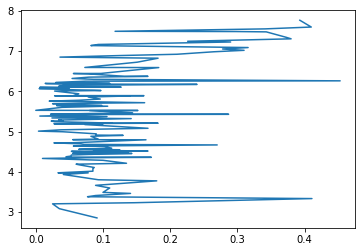

In [48]:
plt.pyplot.plot( "Perceptions of corruption",  "Score", data= happiness)

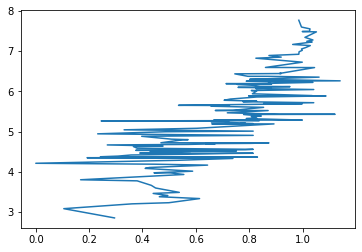

In [50]:
plt.pyplot.plot("Healthy life expectancy",  "Score", data= happiness)


In [51]:
happiness.corr()


,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


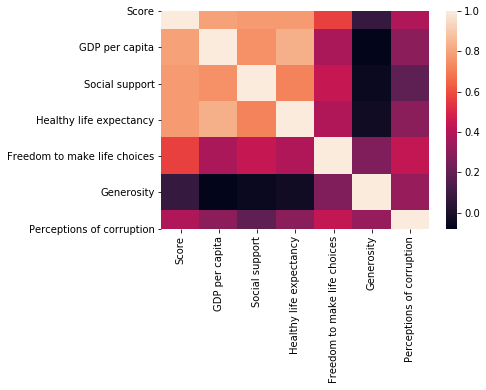

In [52]:
sns.heatmap(happiness.corr())

In [23]:
happiness.drop("Overall rank", axis =1, inplace=True)

In [24]:
happiness

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...
151,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [26]:
from sklearn.model_selection import train_test_split
X = happiness[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption" ]]
y = happiness["Score"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
predictions = model.predict(X_test)

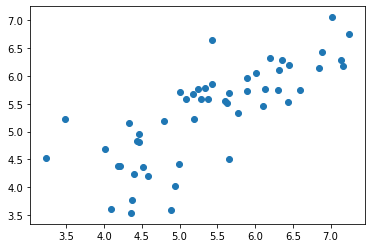

In [34]:
plt.pyplot.scatter(y_test,predictions)

In [36]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', nm.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5062613844479873
MSE: 0.4010773036578635
RMSE: 0.63330664267625


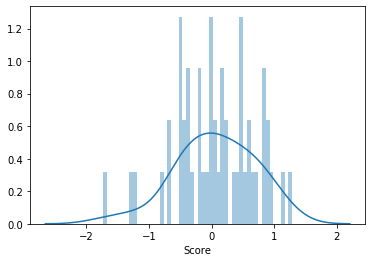

In [37]:
sns.distplot((y_test-predictions),bins=50);

In [39]:
coeffecients = pd.DataFrame(model.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GDP per capita,0.838946
Social support,1.214589
Healthy life expectancy,0.999708
Freedom to make life choices,1.275443
Generosity,0.507925
Perceptions of corruption,1.313280
